In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

2025-08-23 22:54:57.844478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755989697.866663    2004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755989697.873427    2004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_ds = image_dataset_from_directory(
    directory='/kaggle/input/kermany2018/OCT2017 /train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128),
    color_mode='grayscale'  )

test_ds = image_dataset_from_directory(
    directory='/kaggle/input/kermany2018/OCT2017 /test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128),
    color_mode='grayscale'  )

Found 83484 files belonging to 4 classes.


I0000 00:00:1755989719.550118    2004 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 968 files belonging to 4 classes.


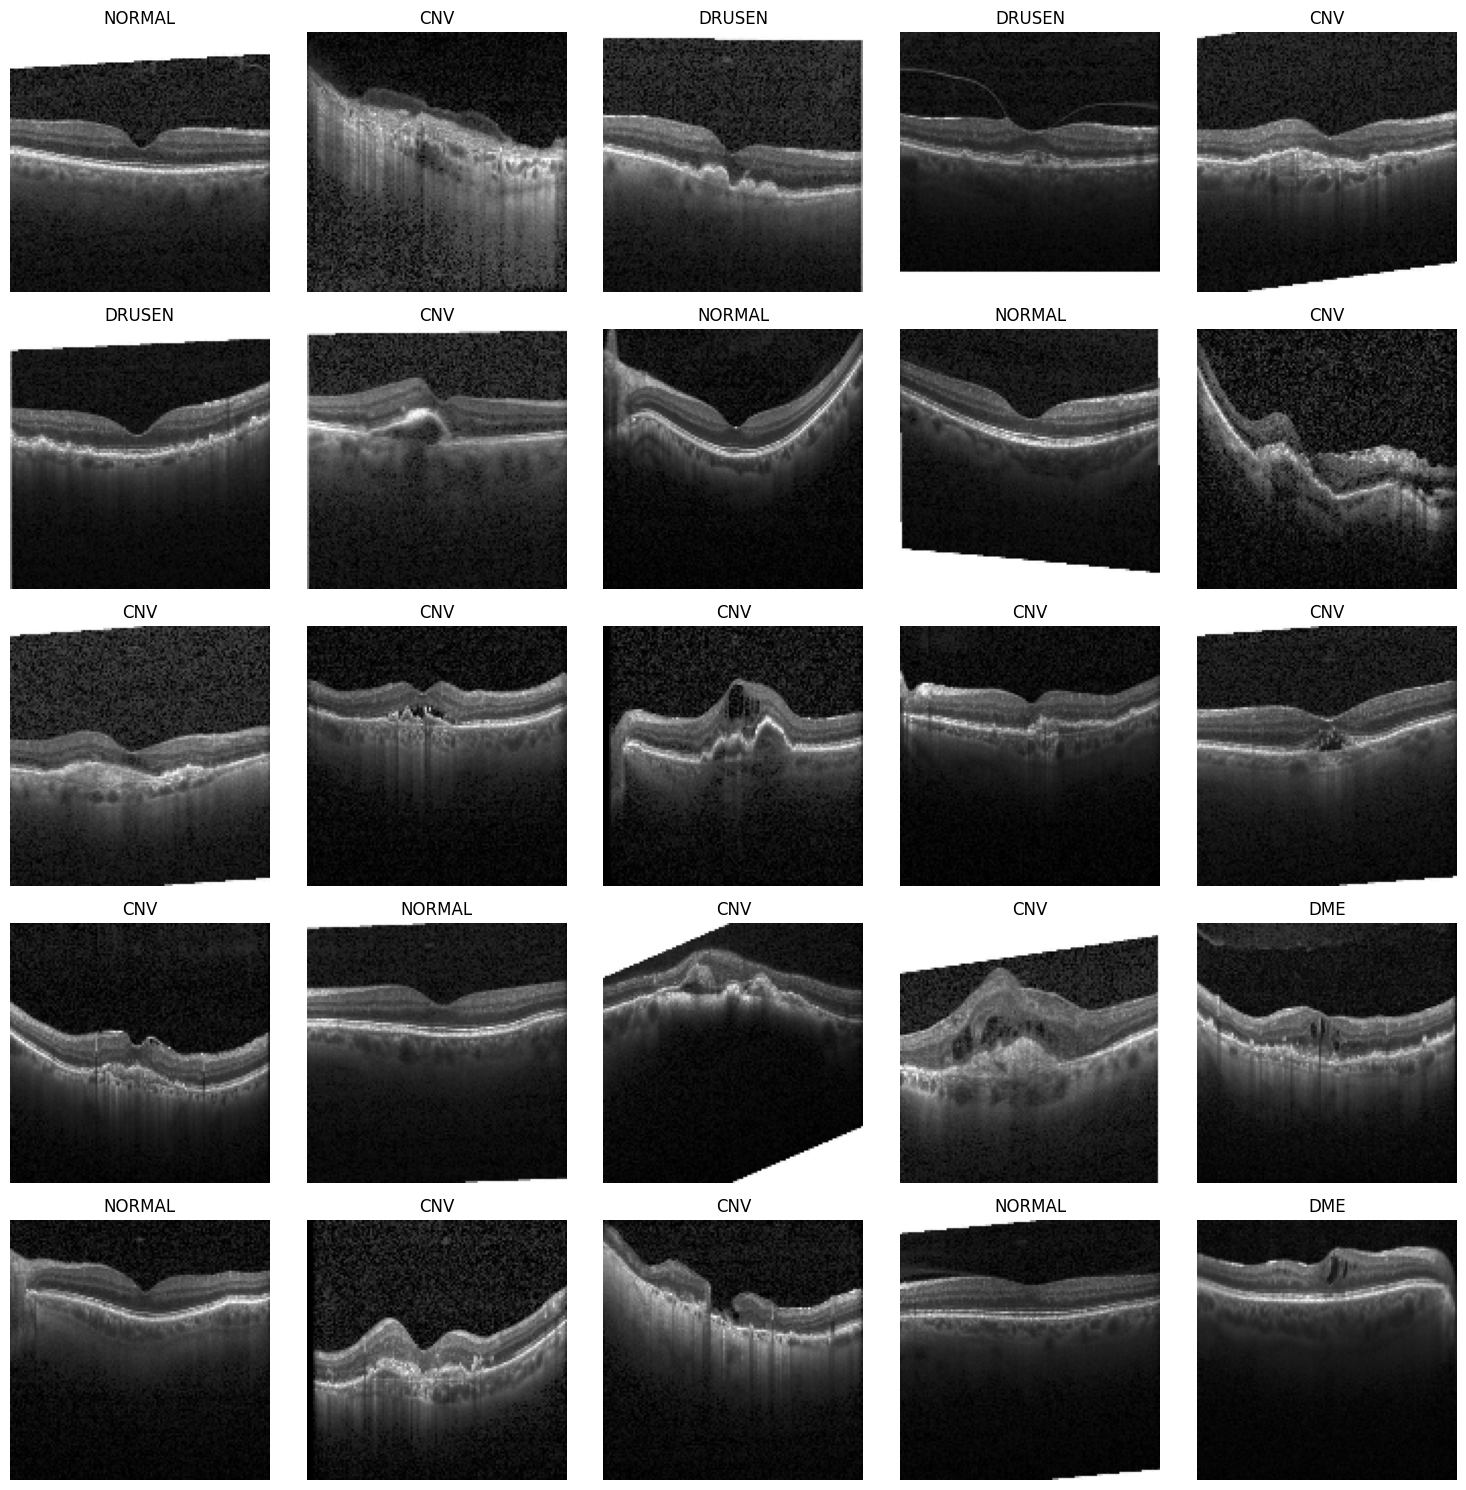

In [3]:
class_names = train_ds.class_names

for images, labels in train_ds.take(1):
    images_np = images.numpy().astype("uint8")
    labels_np = labels.numpy()
    
    idxs = np.random.choice(len(images_np), size=25, replace=False)
    
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(idxs):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images_np[idx], cmap="gray")
        
        # decode one-hot -> class index
        class_id = np.argmax(labels_np[idx])
        plt.title(class_names[class_id])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [4]:
inp = Input((128, 128, 1))


x = Conv2D(64, 3, padding="same")(inp)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(128, 3, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(64, 3, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)


x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation="softmax")(x)

model = Model(inp, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,148 (617.77 KB)

 Trainable params: 157,636 (615.77 KB)

 Non-trainable params: 512 (2.00 KB)

In [5]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall"])

In [6]:
!mkdir models
chkp = tf.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/models/model.keras",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

mkdir: cannot create directory ‘models’: File exists


In [7]:
history = model.fit(train_ds, epochs=15, validation_data=test_ds, callbacks=[chkp])

Epoch 1/15


I0000 00:00:1755989728.645512    2041 service.cc:148] XLA service 0x7dad30033eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755989728.645579    2041 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755989729.072362    2041 cuda_dnn.cc:529] Loaded cuDNN version 90300


  10/2609 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.2613 - loss: 1.5902 - precision: 0.2397 - recall: 0.0982 

I0000 00:00:1755989733.628851    2041 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 123/2609 ━━━━━━━━━━━━━━━━━━━━ 1:02 25ms/step - accuracy: 0.4390 - loss: 1.2877 - precision: 0.4985 - recall: 0.1708

KeyboardInterrupt: 

In [8]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [9]:
val_ds = image_dataset_from_directory(
    directory='/kaggle/input/kermany2018/OCT2017 /val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128),
    color_mode='grayscale' )

Found 32 files belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


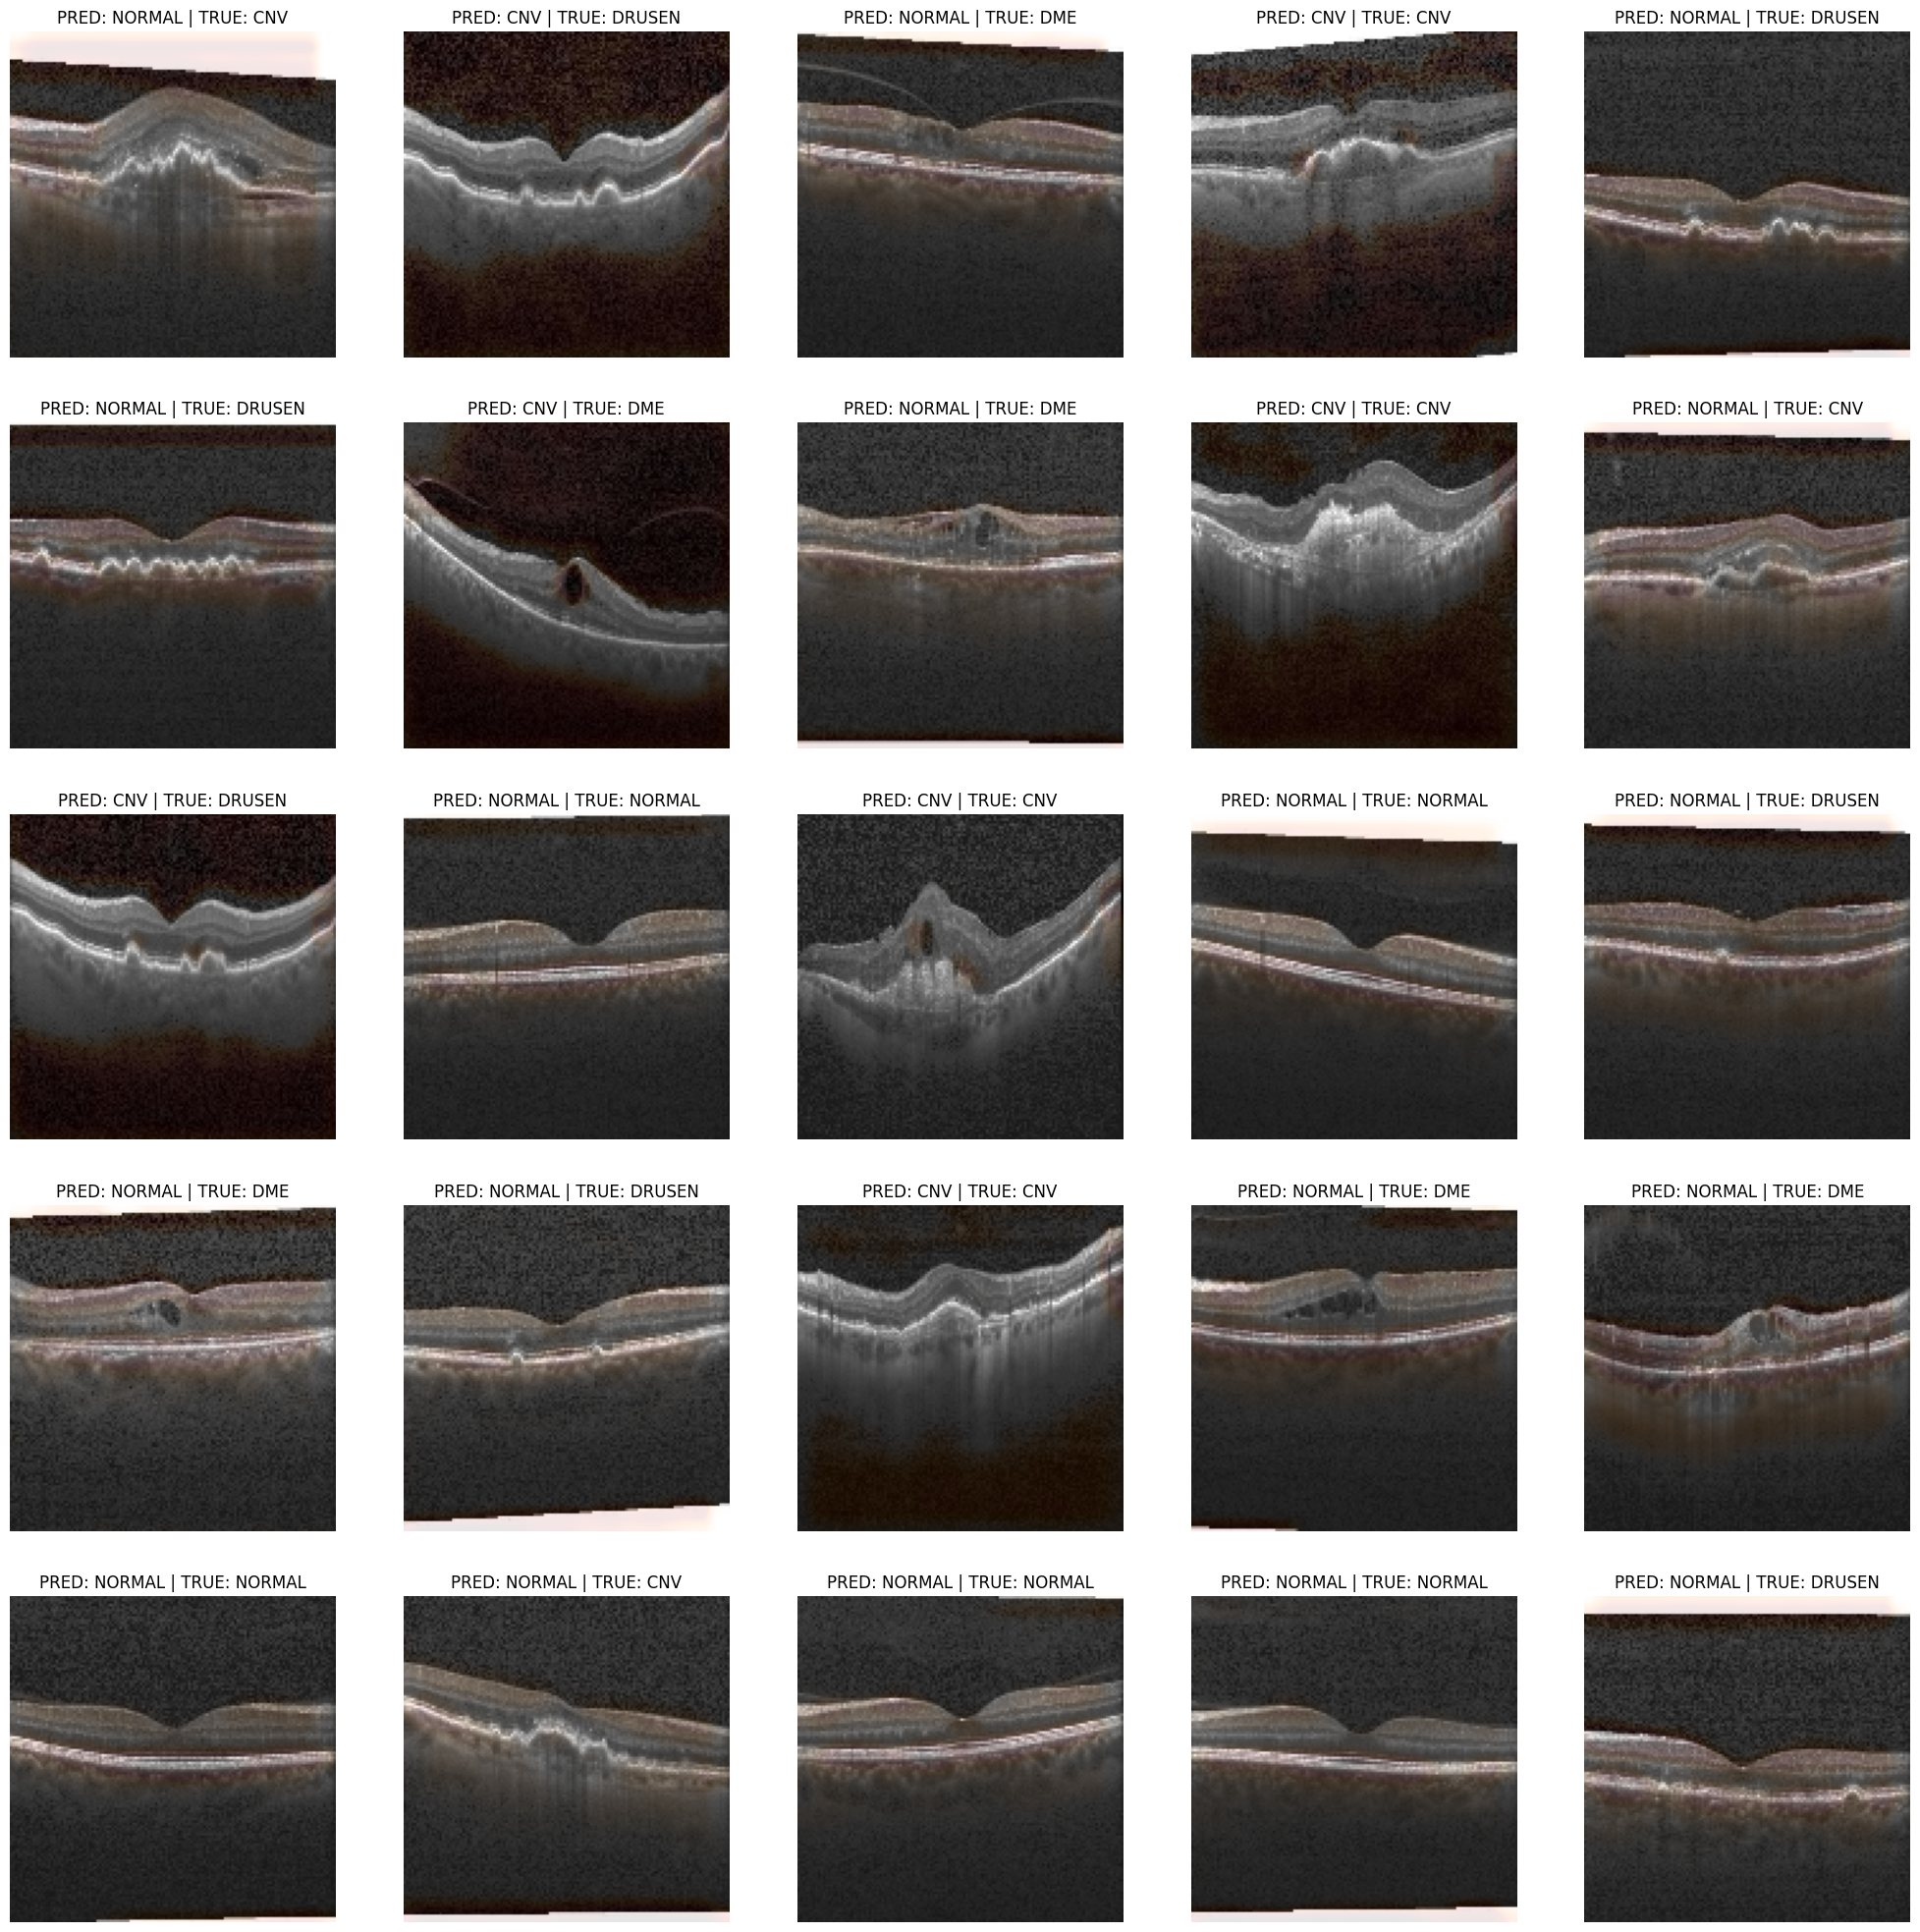

In [18]:
for images, labels in val_ds.take(1):
    images_np = images.numpy()
    labels_np = labels.numpy()
    pred = model.predict(images_np)

    idxs = np.random.choice(len(images_np), size=25, replace=False)
    plt.figure(figsize=(25, 25))

    for i, idx in enumerate(idxs):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images_np[idx].squeeze(), cmap="gray")

        gradcam = make_gradcam_heatmap(
            np.expand_dims(images_np[idx], axis=0),
            model,
            "conv2d_2"
        )
        gradcam = tf.image.resize(gradcam[..., tf.newaxis], (128, 128)).numpy().squeeze()
        gradcam = cv2.blur(gradcam, (3, 3))
        gradcam = gradcam / gradcam.max()  

        plt.imshow(gradcam, cmap="gist_heat_r", alpha=0.1)

        class_id = np.argmax(labels_np[idx])
        pred_id = np.argmax(pred[idx])
        plt.title(f'PRED: {class_names[pred_id]} | TRUE: {class_names[class_id]}')
        plt.axis("off")


In [ ]:
hist = history.history
loss = hist["loss"]
val_loss = hist["val_loss"]

recall = hist["recall"]
val_recall = hist["val_recall"]

precision = hist["precision"]
val_precision = hist["val_precision"]

acc = hist["accuracy"]
val_acc = hist["val_accuracy"]